# Two-Level: Sech Pulse 2π — Narrow, with Decay

Time taken to solve this problem on a 2013 MacBook Pro:
**11min 41s**

## Define the Problem

First we need to define a sech pulse with the area we want. We'll fix the width of the pulse and the area to find the right amplitude.

The full-width at half maximum (FWHM) $t_s$ of the sech pulse is related to the FWHM of a Gaussian by a factor of $1/2.6339157938$. (See §3.2.2 of my [PhD thesis](https://github.com/tommyogden/phd-thesis)).

We then obtain the amplitude $a$ we need from

$$
a = \frac{n}{2 \pi ~ t_s}
$$

In [1]:
import numpy as np

sech_fwhm_conv = 1./2.6339157938
t_width = 0.01*sech_fwhm_conv # [τ]

print('t_width', t_width)

n = 2.0 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl', ampl)

t_width 0.003796628587572578
ampl 83.84014365421667


In [2]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 1.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 83.84014365421667,
        "rabi_freq_t_args": {
          "ampl_1": 1.0,
          "centre_1": 0.0,
          "width_1": 0.003796628587572578
        },
        "rabi_freq_t_func": "sech_1"
      }
    ],
    "num_states": 2
  },
  "t_min": -0.02,
  "t_max": 0.1,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 70,
  "z_steps_inner": 5,
  "num_density_z_func": "square_1",
  "num_density_z_args": {
    "on_1": 0.0,
    "off_1": 1.0,
    "ampl_1": 1.0
  },
  "interaction_strengths": [
    1.0e3
  ],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-sech-2pi-narrower-even-more-atoms-decay"
}
"""

In [3]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

We'll just check that the pulse area is what we want.

In [4]:
print('The input pulse area is {0}'.format(np.trapz(mb_solve_00.Omegas_zt[0,0,:].real, 
                                                    mb_solve_00.tlist)/np.pi))

The input pulse area is 1.993398896148119


## Solve the Problem

In [5]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(step='ab', recalc=False)

Loaded tuple object.
CPU times: user 1.68 ms, sys: 2.64 ms, total: 4.32 ms
Wall time: 7.16 ms


## Plot Output

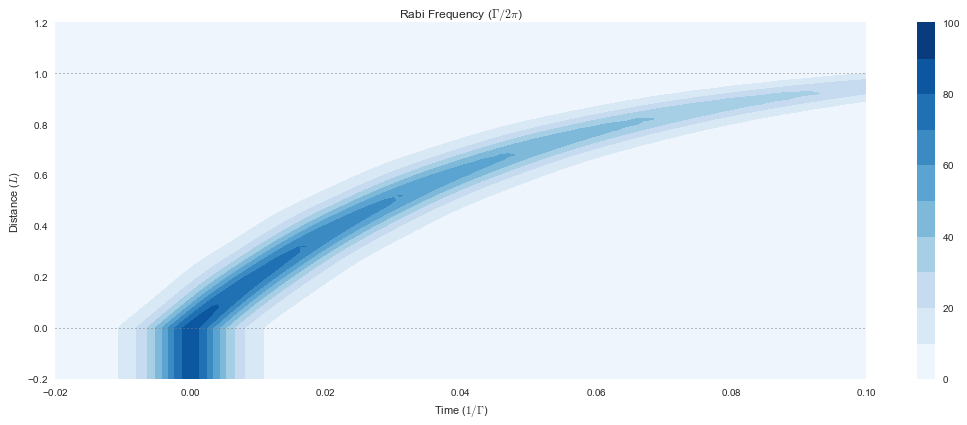

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 100.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/mb-solve-two-sech-2pi-narrower-even-more-atoms-decay.png')

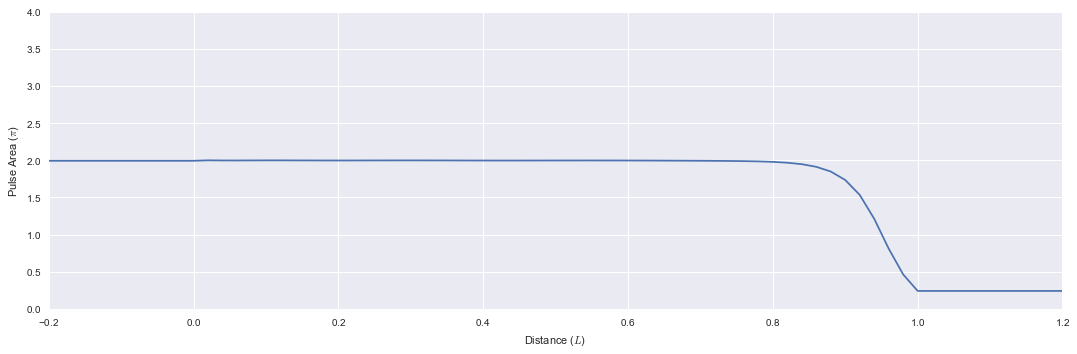

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi)
ax.set_ylim([0.0, 4.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)')

## Analysis

The $2 \pi$ sech pulse spreads and loses amplitude as it moves through atoms with spontaneous decay.